In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn import svm

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [3]:
train = pd.read_csv("location_train.csv")
test = pd.read_csv("location_test.csv")
train.head()

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 448 entries, ID to 446
dtypes: int64(448)
memory usage: 13.7 MB


In [5]:
X_train = train.drop(["ID", "class"], axis=1)
y_train = train["class"]

X_test = test.drop(["ID"], axis=1)

In [6]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,437,438,439,440,441,442,443,444,445,446
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
y_train.head()

0    11
1     3
2     9
3     8
4     3
Name: class, dtype: int64

# Exploratory data analysis

In [8]:
X_train.isnull().sum()

1      0
2      0
3      0
4      0
5      0
      ..
442    0
443    0
444    0
445    0
446    0
Length: 446, dtype: int64

In [9]:
# Appearence of each class

y_train.value_counts().sort_index()

1     132
2     141
3     124
4     135
5      80
6     150
7      90
8     250
9     114
10    173
11    149
12    142
13    103
14     99
15    171
16     83
17    144
18    103
19    146
20    211
21    181
22     98
23    128
24    133
25    100
26    119
27    126
28    127
29    113
30    135
Name: class, dtype: int64

# Feature selection

Feature 0: 0.014583
Feature 1: 0.092786
Feature 2: 0.013870
Feature 3: 0.110993
Feature 4: 0.010373
Feature 5: 0.014040
Feature 6: 0.004617
Feature 7: 0.000796
Feature 8: 0.029550
Feature 9: 0.000000
Feature 10: 0.004675
Feature 11: 0.100075
Feature 12: 0.039617
Feature 13: 0.023830
Feature 14: 0.015585
Feature 15: 0.004610
Feature 16: 0.030514
Feature 17: 0.016107
Feature 18: 0.002124
Feature 19: 0.036870
Feature 20: 0.045319
Feature 21: 0.024021
Feature 22: 0.041839
Feature 23: 0.015496
Feature 24: 0.096463
Feature 25: 0.031122
Feature 26: 0.074633
Feature 27: 0.006672
Feature 28: 0.038128
Feature 29: 0.023642
Feature 30: 0.030965
Feature 31: 0.016234
Feature 32: 0.032914
Feature 33: 0.023767
Feature 34: 0.014540
Feature 35: 0.112063
Feature 36: 0.024810
Feature 37: 0.024566
Feature 38: 0.000000
Feature 39: 0.120795
Feature 40: 0.016103
Feature 41: 0.030119
Feature 42: 0.008388
Feature 43: 0.010859
Feature 44: 0.015784
Feature 45: 0.005231
Feature 46: 0.047992
Feature 47: 0.014652
Fe

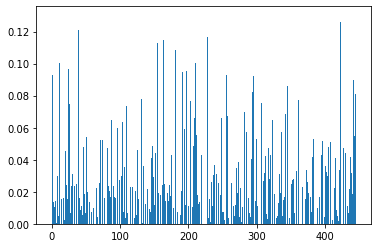

In [10]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

fs = SelectKBest(score_func=mutual_info_classif, k=300)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Model selection

In [12]:
# Simple Grid Search to find best hyperparameters for different classifier

cv = 5          # number of folds
verbose = 1     # information shown during training

## KNN

In [13]:
parameters = {
    "n_neighbors":[1, 5, 10, 20, 30, 40, 50], 
    "weights":["uniform", "distance"],
    "metric":["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]}
knn = GridSearchCV(neighbors.KNeighborsClassifier(), parameters, cv=cv, verbose=verbose)
knn.fit(X_train_fs, y_train)

knn_results = pd.DataFrame(knn.cv_results_)
knn_results= knn_results[["param_n_neighbors", "param_weights", "param_metric", "mean_test_score"]]
knn_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


,param_n_neighbors,param_weights,param_metric,mean_test_score
25,40,distance,manhattan,0.50575
53,40,distance,minkowski,0.50550
11,40,distance,euclidean,0.50550
27,50,distance,manhattan,0.50200
23,30,distance,manhattan,0.50150
9,30,distance,euclidean,0.50150
51,30,distance,minkowski,0.50150
13,50,distance,euclidean,0.50025
55,50,distance,minkowski,0.50025
10,40,uniform,euclidean,0.49775


## Decision Tree

In [14]:
parameters = {
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"], 
    "max_depth":["None", 5, 10, 20, 30],
    "max_features":["auto", "sqrt", "log2"]}
dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=cv, verbose=verbose)
dt.fit(X_train_fs, y_train)

dt_results = pd.DataFrame(dt.cv_results_)
dt_results = dt_results[["param_criterion", "param_splitter", "param_max_depth", "param_max_features", "mean_test_score"]]
dt_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,param_criterion,param_splitter,param_max_depth,param_max_features,mean_test_score
12,gini,best,10,auto,0.24775
19,gini,random,20,auto,0.24675
13,gini,random,10,auto,0.24500
20,gini,best,20,sqrt,0.24425
18,gini,best,20,auto,0.24275
15,gini,random,10,sqrt,0.24275
14,gini,best,10,sqrt,0.24025
24,gini,best,30,auto,0.23975
42,entropy,best,10,auto,0.23950
25,gini,random,30,auto,0.23775


## Random Forest

In [15]:
parameters = {
    "n_estimators":[10, 50, 100, 200, 300, 400, 500], 
    "criterion":["gini", "entropy"], 
    "max_depth":["None", 5, 10, 20],
    "max_features":["auto", "sqrt", "log2"]}
rf = GridSearchCV(RandomForestClassifier(), parameters, cv=cv, verbose=verbose)
rf.fit(X_train_fs, y_train)

rf_results = pd.DataFrame(rf.cv_results_)
rf_results = rf_results[["param_n_estimators", "param_criterion", "param_max_depth", "param_max_features", "mean_test_score"]]
rf_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


,param_n_estimators,param_criterion,param_max_depth,param_max_features,mean_test_score
83,500,gini,20,log2,0.53875
81,300,gini,20,log2,0.53450
82,400,gini,20,log2,0.53300
69,500,gini,20,auto,0.53300
75,400,gini,20,sqrt,0.53100
76,500,gini,20,sqrt,0.53050
80,200,gini,20,log2,0.52850
68,400,gini,20,auto,0.52775
166,400,entropy,20,log2,0.52725
74,300,gini,20,sqrt,0.52400


## SVM

In [18]:
parameters = {
    "C":[1, 5, 10, 20],
    "kernel":["linear", "sigmoid", "rbf", "poly"],     
    "degree":[3, 5],
    "gamma":["scale", "auto"],
    "class_weight":["None", "balanced"]}
svm = GridSearchCV(svm.SVC(), parameters, cv=cv, verbose=verbose)
svm.fit(X_train_fs, y_train)

svm_results = pd.DataFrame(svm.cv_results_)
svm_results = svm_results[["param_C", "param_kernel", "param_degree", "param_gamma", "param_class_weight", "mean_test_score"]]
svm_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


## Logistic Regression

In [16]:
parameters = {
    "penalty":["l1", "l2", "elasticnet", "none"], 
    "C":[1, 5, 10, 20],
    "class_weight":["None", "balanced"],
    "solver":["saga"]}
logreg = GridSearchCV(LogisticRegression(), parameters, cv=cv, verbose=verbose)
logreg.fit(X_train_fs, y_train)

logreg_results = pd.DataFrame(logreg.cv_results_)
logreg_results = logreg_results[["param_penalty", "param_C", "param_class_weight", "mean_test_score"]]
logreg_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,param_penalty,param_C,param_class_weight,mean_test_score
5,l2,1,balanced,0.58350
4,l1,1,balanced,0.57725
13,l2,5,balanced,0.57175
21,l2,10,balanced,0.57175
29,l2,20,balanced,0.57025
12,l1,5,balanced,0.56975
28,l1,20,balanced,0.56950
20,l1,10,balanced,0.56925
23,none,10,balanced,0.56825
7,none,1,balanced,0.56700


## Stochastic Gradient Descent

In [17]:
parameters = {
    "loss":["hinge", "log", "modified_huber", "squared_hinge", "perceptron"], 
    "penalty":["l2", "l1", "elasticnet"],
    "alpha":[0.0001, 0.001, 0.01]}
sgd = GridSearchCV(SGDClassifier(), parameters, cv=cv, verbose=verbose)
sgd.fit(X_train_fs, y_train)

sgd_results = pd.DataFrame(sgd.cv_results_)
sgd_results = sgd_results[["param_loss", "param_penalty", "param_alpha", "mean_test_score"]]
sgd_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


,param_loss,param_penalty,param_alpha,mean_test_score
33,log,l2,0.01,0.56525
18,log,l2,0.001,0.55350
20,log,elasticnet,0.001,0.55000
36,modified_huber,l2,0.01,0.53950
38,modified_huber,elasticnet,0.01,0.53800
30,hinge,l2,0.01,0.52775
15,hinge,l2,0.001,0.52225
19,log,l1,0.001,0.52000
17,hinge,elasticnet,0.001,0.51550
35,log,elasticnet,0.01,0.51550


In [ ]:
# convert results in markdown table

# result = knn_results
# print(result.sort_values(["mean_test_score"], ascending=False).head(20).to_markdown(index=False))

# Final model

In [ ]:
model = svm.SVC(C=5, kernel="rbf", gamma="scale")
model.fit(X_train_fs, y_train)

In [ ]:
predictions = pd.DataFrame(test["ID"])
predictions["class"] = model.predict(X_test_fs)

In [ ]:
predictions.to_csv("submission.csv", index=False)